- scipy.ndimage: https://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html
- scikit-image: http://scikit-image.org/docs/stable/
- opencv: https://docs.opencv.org/3.3.1/index.html
- PIL: http://pillow.readthedocs.io/en/latest/, https://pillow.readthedocs.io/en/3.0.x/reference/index.html

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
import scipy.ndimage as ndi
from skimage.io import imread, imsave
import PIL
import matplotlib.image as mpimg
img = "assets/panda.jpg"
import skimage.data
import skimage

### load image

In [11]:
cv_frame = cv2.imread(img)
skimage_arr = imread(img) # based on PIL
scimg_arr = ndi.imread(img) # based on PIL
mpimg_arr = mpimg.imread(img) # based on PIL
pil_arr = PIL.Image.open(img)

In [12]:
assert np.all(skimage_arr == scimg_arr)
assert np.all(scimg_arr == mpimg_arr)
assert np.all(mpimg_arr == pil_arr)

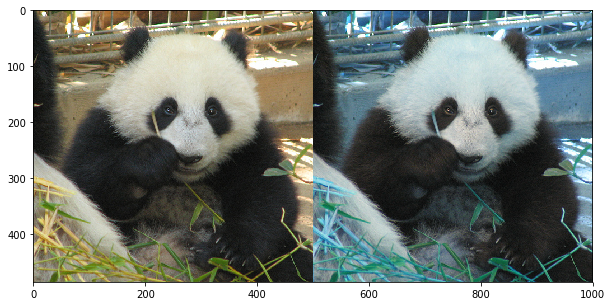

In [13]:
plt.imshow(np.concatenate((pil_arr, cv_frame), axis = 1))
plt.show()

### Watershed algorithm

- step1: [represent the summary of euclidean distance to background](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.distance_transform_edt.html#scipy.ndimage.morphology.distance_transform_edt)
- step2: [extract the peak value, which is the local maxima in a particular region](http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.peak_local_max)
- step3: start from the lowest (-peak) value, based on the distance (gradient) to pull water till overflow, [scikit-image api](http://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.watershed)

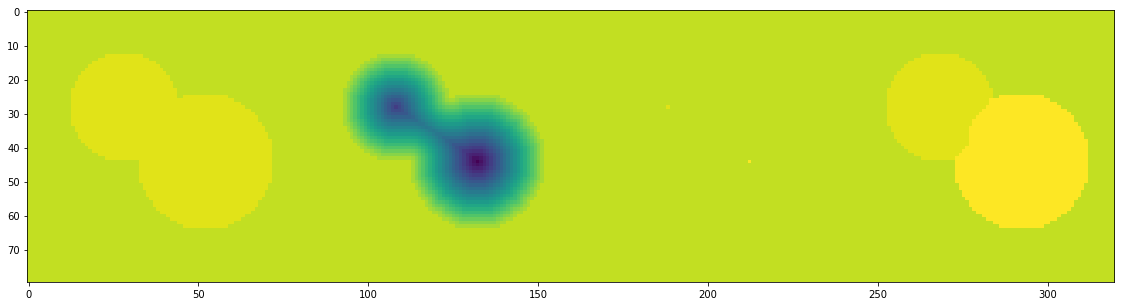

In [98]:
# generate a binary image with two overlap cycle area
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# step1
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(image)

# step2
from skimage.feature import peak_local_max
local_maxi = peak_local_max(distance, labels=image,
                            footprint=np.ones((3, 3)),
                            indices=False)
markers = ndi.label(local_maxi)[0]

# step3
labels = watershed(-distance, markers, mask=image)
plt.imshow(np.concatenate((image, -distance, markers ,labels), axis=1))
plt.show()

### connection
- scikit-image: http://scikit-image.org/docs/dev/api/skimage.morphology.html#label
- opencv solution: https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python
- twp-pass algorith: http://aishack.in/tutorials/labelling-connected-components-example/

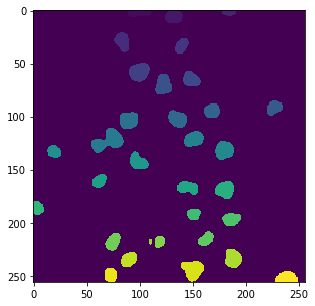

In [135]:
from skimage.morphology import label
img_arr = imread("assets/mask.png")
labels = label(img_arr, connectivity=1)
plt.imshow(labels)
plt.show()

In [136]:
# https://stackoverflow.com/questions/27014207/failure-to-use-adaptivethreshold-cv-8uc1-in-function-adaptivethreshold
src = cv2.imread('assets/mask.png', 0)
# # src = src.astype(float)
# # Threshold it so it becomes binary
# ret, thresh = cv2.threshold(src,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # You need to choose 4 or 8 for connectivity type
# connectivity = 4  
# # Perform the operation
# output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# # Get the results
# # The first cell is the number of labels
# num_labels = output[0]
# # The second cell is the label matrix
# labels = output[1]
# # The third cell is the stat matrix
# stats = output[2]
# # The fourth cell is the centroid matrix
# centroids = output[3]

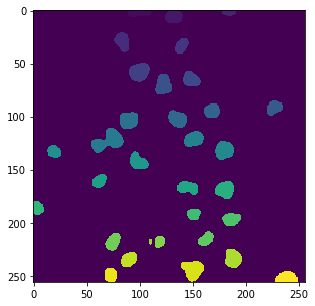

In [137]:
plt.imshow(labels)
plt.show()

### draw rectangle

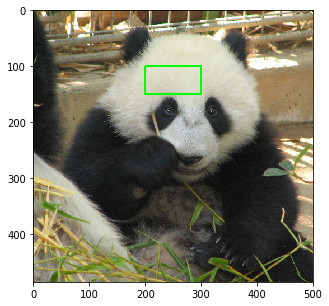

In [73]:
def draw_rectangle_cv(img, row, col, H, W, color):
    """
    draw rectangle to a new image array
    param:
    - img, ndarray
    - row, start pixel row
    - col, start pixel column
    - H, line height
    - W, line width
    """
    new_img = img.copy()
    cv2.rectangle(new_img, (col, row), (col + W, row + H), color, 2)
    return new_img
plt.imshow(draw_rectangle_cv(skimage_arr, 100, 200, 50, 100, [0, 255, 0]))
plt.show()

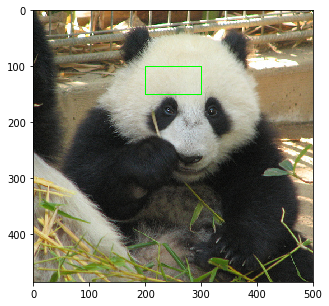

In [71]:
from skimage.draw import line as draw_line
def draw_rectangle(img, row, col, H, W, color):
    """
    draw rectangle to a new image array
    param:
    - img, ndarray
    - row, start pixel row
    - col, start pixel column
    - H, line height
    - W, line width
    """
    line1 = draw_line(row, col, row, col + W)
    line2 = draw_line(row, col, row + H, col)
    line3 = draw_line(row + H, col, row + H, col + W)
    line4 = draw_line(row, col + W, row + H, col + W)
    new_img = img.copy()
    new_img[line1] = color
    new_img[line2] = color
    new_img[line3] = color
    new_img[line4] = color
    return new_img
plt.imshow(draw_rectangle(skimage_arr, 100, 200, 50, 100, [0, 255, 0]))
plt.show()

### Resize

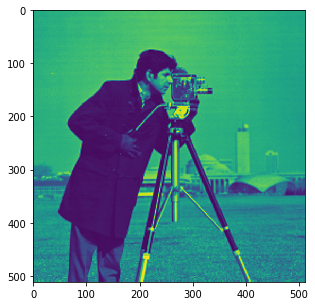

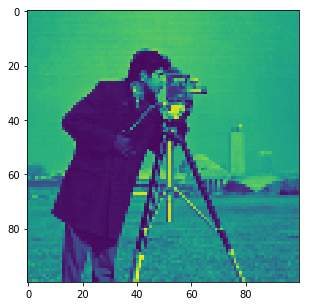

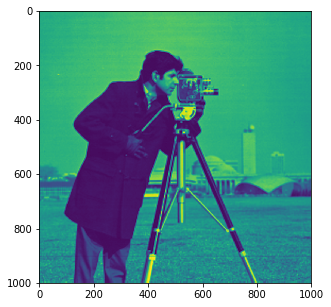

In [5]:
from skimage import data
from skimage.transform import resize
image = data.camera()
plt.imshow(image)
plt.show()
plt.imshow(resize(image, (100, 100), mode='reflect'))
plt.show()
plt.imshow(resize(image, (1000, 1000), mode='wrap'))
plt.show()

### Extract EXIF information of image

In [21]:
import PIL.Image
import PIL.ExifTags

i = PIL.Image.open("assets/IMG_4698.JPG")
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in i._getexif().items()
    if k in PIL.ExifTags.TAGS
}

exif

{'ApertureValue': (2159, 1273),
 'BrightnessValue': (16979, 1845),
 'ColorSpace': 1,
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'DateTime': '2018:03:31 17:35:54',
 'DateTimeDigitized': '2018:03:31 17:35:54',
 'DateTimeOriginal': '2018:03:31 17:35:54',
 'ExifImageHeight': 3024,
 'ExifImageWidth': 4032,
 'ExifOffset': 218,
 'ExifVersion': b'0221',
 'ExposureBiasValue': (0, 1),
 'ExposureMode': 0,
 'ExposureProgram': 2,
 'ExposureTime': (1, 863),
 'FNumber': (9, 5),
 'Flash': 16,
 'FlashPixVersion': b'0100',
 'FocalLength': (399, 100),
 'FocalLengthIn35mmFilm': 28,
 'GPSInfo': {1: 'N',
  2: ((35, 1), (30, 1), (4599, 100)),
  3: 'E',
  4: ((138, 1), (46, 1), (224, 100)),
  5: b'\x00',
  6: (59381, 71),
  7: ((8, 1), (35, 1), (52, 1)),
  12: 'K',
  13: (17, 100),
  16: 'T',
  17: (40171, 213),
  23: 'T',
  24: (40171, 213),
  29: '2018:03:31',
  31: (5, 1)},
 'ISOSpeedRatings': 20,
 'LensMake': 'Apple',
 'LensModel': 'iPhone 7 back camera 3.99mm f/1.8',
 'LensSpecification': ((399, 1

### Edge detection

- source code: https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py
>Different operators compute different finite-difference approximations of the gradient. 

```python
def sobel(image, mask=None):
    out = np.sqrt(sobel_h(image, mask)**2 + sobel_v(image, mask)**2)
    out /= np.sqrt(2)
    return out


def sobel_h(image, mask=None):
    """
    Notes
    -----
    We use the following kernel::
      1   2   1
      0   0   0
     -1  -2  -1
    """
    assert_nD(image, 2)
    image = img_as_float(image)
    result = convolve(image, HSOBEL_WEIGHTS)
    return _mask_filter_result(result, mask)


def sobel_v(image, mask=None):
    """
    We use the following kernel::
      1   0  -1
      2   0  -2
      1   0  -1
    """
    assert_nD(image, 2)
    image = img_as_float(image)
    result = convolve(image, VSOBEL_WEIGHTS)
    return _mask_filter_result(result, mask)
```

In [4]:
from  import camera
image = camera()

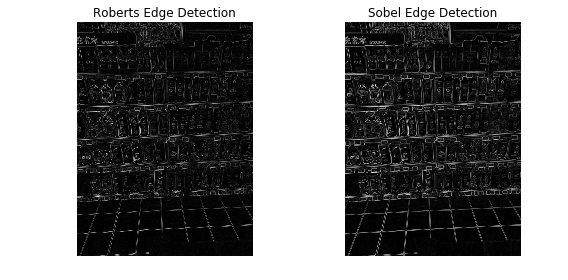

In [8]:
from skimage.filters import roberts, sobel, scharr, prewitt

image = imread("assets/12389.jpg")[:,:,0]
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Mean filter

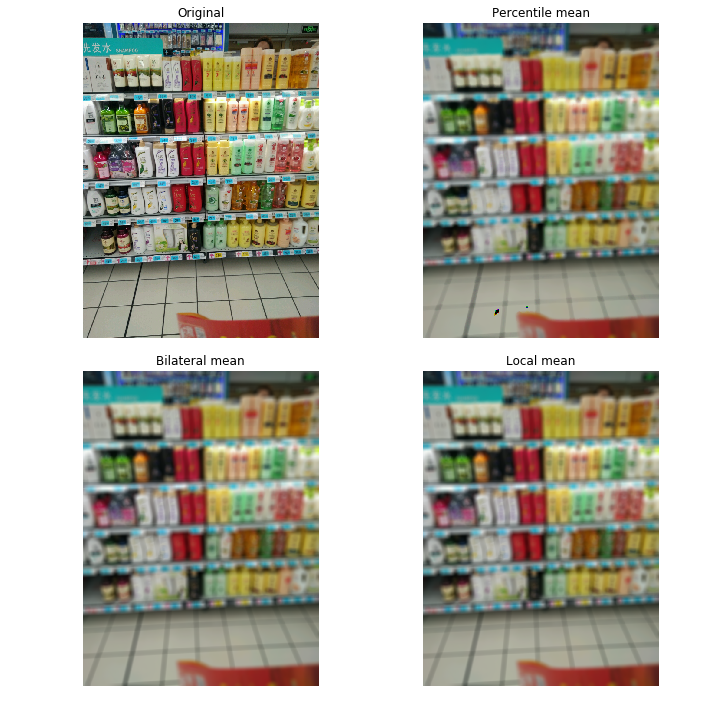

In [17]:
# http://scikit-image.org/docs/stable/auto_examples/filters/plot_rank_mean.html
from skimage.morphology import disk
from skimage.filters import rank

origin_image = imread("assets/12389.jpg")
percentile_result_l = []
bilateral_result_l = []
normal_result_l = []
for i in range(3):
    image = origin_image[:, :, i]
    selem = disk(10)
    percentile_result_l.append(rank.mean_percentile(image, selem=selem, p0=.1, p1=.9))
    bilateral_result_l.append(rank.mean_bilateral(image, selem=selem, s0=500, s1=500))
    normal_result_l.append(rank.mean(image, selem=selem))

percentile_result = np.stack(percentile_result_l, axis=-1)
bilateral_result = np.stack(bilateral_result_l, axis=-1)
normal_result = np.stack(normal_result_l, axis=-1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [origin_image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()